# 4.10 . ANSWERS 2.0

In [1]:
# import all libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating a shortcut to access the Instacart Basket data as path

path= r'C:\Users\carol\Documents\20.06 Instacart Basket Analysis'

In [3]:
# importing data merge with customers

df_total = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_agg_2.pkl'))

In [4]:
# checking DF data

df_total.head(5)

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,...,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,0,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,0,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


# QUESTION 2. PII

**NOTE**:As part of the data set we have some personal information (PII) such us First and Last name and gender that will need to be addressed to keep data privacy regulation in the European Union that governs the storage, usage, and sharing of data. However, before doing so this will need to be checked a collegue or the client to double check the correct approach to this. *For this exercise I am not removing any information from the DF*.

# QUESTION 3. CREATE 'REGION' COLUMN AND ANALYSE CUSTOMER SPENDING BEHAVIOUR

In [5]:
# Define regions based on states

northeast_states = [
    'Maine', 'New Hampshire', 'Vermont', 'Massachusetts',
    'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'
]
midwest_states = [
    'Ohio', 'Michigan', 'Indiana', 'Illinois', 'Wisconsin', 'Minnesota',
    'Iowa', 'Missouri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas'
]
south_states = [
    'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia',
    'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky',
    'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas',
    'Louisiana'
]
west_states = [
    'Idaho', 'Montana', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Utah',
    'Nevada', 'Washington', 'Oregon', 'California', 'Alaska', 'Hawaii'
]

In [6]:
# Create the 'Region' column

df_total.loc[df_total['state'].isin(northeast_states), 'region'] = 'Northeast'
df_total.loc[df_total['state'].isin(midwest_states), 'region'] = 'Midwest'
df_total.loc[df_total['state'].isin(south_states), 'region'] = 'South'
df_total.loc[df_total['state'].isin(west_states), 'region'] = 'West'

In [7]:
#Checking the creation of the new column 'region'

df_total.head(5)

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,...,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,...,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast
3,0,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,...,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest
4,0,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,...,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest


In [8]:
# Checking region data number

df_total['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [9]:
#Create a crossbar 

Region_spending_flag = pd.crosstab(df_total['region'],df_total['spending_flag'], dropna = False)

In [10]:
#Checking data from Region_spending _flag

Region_spending_flag

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


**NOTE**:
**
The South regi**on has the highest number of both high spenders (209,691) and low spenders (10,582,194), indicating it has the largest customer base**.
The Northeast reg**ion has the fewest high spenders (108,225) and low spenders (5,614,511), indicating it has the smallest customer base.

In all regions, the number of low spenders significantly outweighs the number of high spenders.
The ratio of high spenders to low spenders is roughly consistent across the regions.

Marketing efforts could be tailored to regions with fewer high spenders to potentially increase their n*umbers.
Further analysis might be needed to understand the factors contributing to high spending in ea*ch region.

In [11]:
# Creating crosstab for data visualization

crosstab = pd.crosstab(df_total['region'], df_total['spending_flag'], dropna = False)

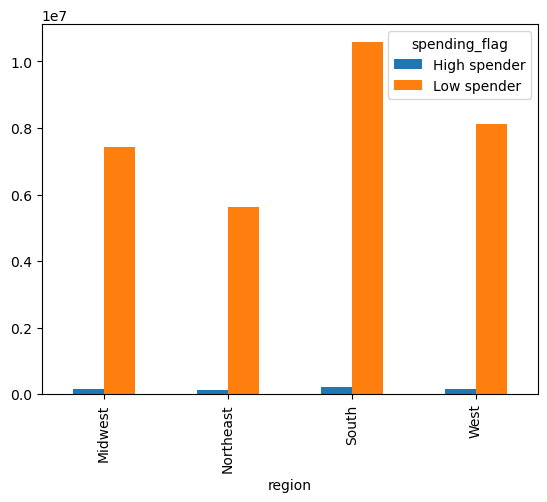

In [12]:
Bar3 = crosstab.plot(kind = 'bar')

# QUESTION 4. CREATE EXCLUSION FLAG FOR LOW ACTIVITY CUSTOMERS

In [13]:
#Create an exlcusion flag based on users orders (<5 to exlude and > 5 include)

df_total.loc[df_total['max_order'] < 5, 'exclusion_flag'] = 'Exclude'
df_total.loc[df_total['max_order'] >= 5, 'exclusion_flag'] = 'Include'


In [14]:
#Checking creation of exclusion flag

df_total.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,...,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region,exclusion_flag
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Include
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Include
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,...,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast,Include
3,0,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,...,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest,Exclude
4,0,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,...,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest,Exclude


In [15]:
# Creating a sample with the 'include' data. This DF will show the activity of the highly engaged customers (CS purchasing over 5 orders)

# 1. counting the number of records under the exclusion flag

df_total['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Include    30964564
Exclude     1440295
Name: count, dtype: int64

**NOTE**: there will be 1,440,295 records removed

In [16]:
# 2. Creating a new DF df_total_high_act that will only contain the data from the 'include' column ( CS purchasing over 5 orders)

df_total_high_act = df_total[df_total['exclusion_flag'] == 'Include']

In [17]:
# checking data from new DF 

df_total_high_act.shape

(30964564, 32)

In [18]:
# Exporting DF as pickle

df_total_high_act.to_pickle(os.path.join(path, '02 Data', 'Prepared data', 'df_total_high_act.pkl'))

# QUESTION 5. 

In [19]:
# import newly created DF with highly engaged customers

df_total_high_act=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'df_total_high_act.pkl'))

In [20]:
# Checking DF data

df_total_high_act.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,...,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region,exclusion_flag
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Include
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Include
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,...,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast,Include
5,0,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,...,Female,Hawaii,51,1/4/2019,2,married,57797,both,West,Include
6,0,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,...,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,South,Include


In [21]:
# Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

#1. Profiling based on age. 

df_total_high_act.loc[df_total_high_act['age'] <= 20, 'age_group'] = 'Young '
df_total_high_act.loc[(df_total_high_act['age'] > 20) & (df_total_high_act['age'] <= 30), 'age_group'] = 'Young- Adult'
df_total_high_act.loc[(df_total_high_act['age'] > 30) & (df_total_high_act['age'] <= 60), 'age_group'] = 'Middle-aged Adult'
df_total_high_act.loc[df_total_high_act['age'] > 60, 'age_group'] = 'Senior'

In [22]:
# Checking creation of the new column 'age-group'

df_total_high_act.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,...,state,age,date_joined,n_dependants,marital_status,income,_merge,region,exclusion_flag,age_group
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,...,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Include,Senior
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,...,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,Include,Senior
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,...,Vermont,66,6/16/2018,2,married,158302,both,Northeast,Include,Senior
5,0,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,...,Hawaii,51,1/4/2019,2,married,57797,both,West,Include,Middle-aged Adult
6,0,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,...,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,South,Include,Young


In [23]:
# Counting data from new column 'age-group'

df_total_high_act['age_group'].value_counts(dropna = False)

age_group
Middle-aged Adult    14547717
Senior               10112607
Young- Adult          4849512
Young                 1454728
Name: count, dtype: int64

**NOTE**: Middle-aged adult ( people between 30-60) is the group with the highest number of customers. Marketing strategies could focus more on middle-aged adults and seniors, as they represent the majority of the customer base. Consider campaigns that specifically cater to the needs and preferences of these age groups.
*
Market opportunities within younger demographi*cs.

In [24]:
# checking min,max and mean from 'income'

income_agg = df_total_high_act.agg({'income': ['mean', 'min', 'max']})

In [25]:
# Checking data

income_agg

,income
mean,99675.865108
min,25903.000000
max,593901.000000


In [26]:
#2. Profiling based on income. Creating new column named 'income_group'

df_total_high_act.loc[df_total_high_act['income'] <= 50000, 'income_group'] = 'Low income '
df_total_high_act.loc[(df_total_high_act['income'] > 50000) & (df_total_high_act['income'] <= 100000), 'income_group'] = 'Mid income'
df_total_high_act.loc[(df_total_high_act['income'] >100000) & (df_total_high_act['income'] <= 300000), 'income_group'] = 'Mid-High income'
df_total_high_act.loc[df_total_high_act['income'] > 300000, 'income_group'] = 'High income'

In [27]:
# Checking creation of the new column 'income-group'

df_total_high_act.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,...,age,date_joined,n_dependants,marital_status,income,_merge,region,exclusion_flag,age_group,income_group
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,...,81,8/1/2019,1,married,49620,both,Midwest,Include,Senior,Low income
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,...,81,8/1/2019,1,married,49620,both,Midwest,Include,Senior,Low income
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,...,66,6/16/2018,2,married,158302,both,Northeast,Include,Senior,Mid-High income
5,0,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,...,51,1/4/2019,2,married,57797,both,West,Include,Middle-aged Adult,Mid income
6,0,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,...,20,5/8/2019,3,living with parents and siblings,34171,both,South,Include,Young,Low income


In [28]:
# Counting data from new column 'age-group'

df_total_high_act['income_group'].value_counts(dropna = False)

income_group
Mid-High income    14106999
Mid income         13394982
Low income          3362554
High income          100029
Name: count, dtype: int64

**NOTE**: The mayority of the customer fall under the Low income flag ( <=100K a year). The second largest group are the Mid income (Between 100K to 300K a year)

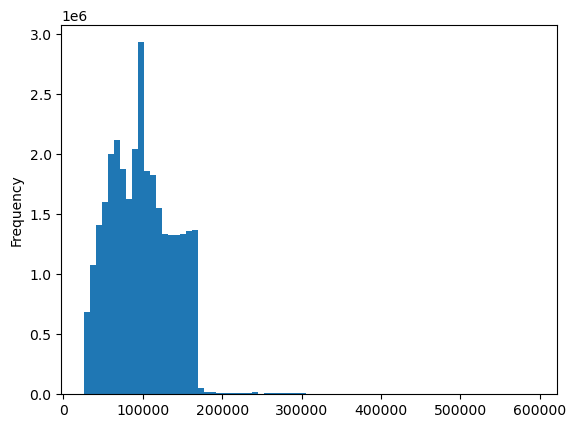

In [29]:
# Creating a histogram

hist_income= df_total_high_act[('income')].plot.hist(bins=75)

# Export histogram on income distribution

In [30]:
hist_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_income.png'))

**NOTE**: The histogram appears to be left skewed with the higher frequency of income under 180K.

In [31]:
# 3. Profiling based on certain goods in the “department_id” column

df_total_high_act.loc[df_total_high_act['department_id']== 8, 'department_group'] = 'Pet Owners'
df_total_high_act.loc[df_total_high_act['department_id'].isin([3, 9]), 'department_group'] = 'With Gluten'
df_total_high_act.loc[df_total_high_act['department_id']== 18, 'department_group'] = 'Parents'
df_total_high_act.loc[df_total_high_act['department_id'].isin([1, 15, 19]), 'department_group'] = 'Fast Food'
df_total_high_act.loc[df_total_high_act['department_id'].isin([17, 13, 10]), 'department_group'] = 'Family'
df_total_high_act.loc[df_total_high_act['department_id'].isin([3,4,16]), 'department_group'] = 'Fresh goods'
df_total_high_act.loc[df_total_high_act['department_id']== 20, 'department_group'] = 'High value Goods'
df_total_high_act.loc[df_total_high_act['department_id'].isin([2,21]), 'department_group'] = 'Not Specified'

In [32]:
#Checking data

df_total_high_act['department_group'].value_counts(dropna = False)


department_group
Fresh goods         15377283
Fast Food            5900211
NaN                  4742456
Family               2516013
High value Goods     1003834
With Gluten           822136
Parents               410392
Not Specified          99179
Pet Owners             93060
Name: count, dtype: int64

In [33]:
# 4. Profiling based on Orders_dow ( day of the week)

df_total_high_act.loc[df_total_high_act['order_dow'].isin([0,6]), 'day_group'] = 'Weekend'
df_total_high_act.loc[df_total_high_act['order_dow'].isin([1,2,3,4,5]), 'day_group'] = 'Weekday'

In [34]:
#Checking data from new column  'day_group'

df_total_high_act['day_group'].value_counts(dropna = False)

day_group
Weekday    20764650
Weekend    10199914
Name: count, dtype: int64

**NOTE**: 67% of the orders are completed during the week. Only 32.9 are done during the weekend

In [35]:
# 5. Profile based on order_hour_of_day 

df_total_high_act.loc[df_total_high_act['order_hour_of_day'] < 6, 'hour_group'] = 'Wee-hours Shopper'
df_total_high_act.loc[(df_total_high_act['order_hour_of_day'] >= 6) & (df_total_high_act['order_hour_of_day'] <= 12), 'hour_group'] = 'Morning Shopper'
df_total_high_act.loc[(df_total_high_act['order_hour_of_day'] > 12) & (df_total_high_act['order_hour_of_day'] <= 18), 'hour_group'] = 'Afternoon Shopper'
df_total_high_act.loc[(df_total_high_act['order_hour_of_day'] > 18) & (df_total_high_act['order_hour_of_day'] <= 22), 'hour_group'] = 'Night Shopper'
df_total_high_act.loc[df_total_high_act['order_hour_of_day'] > 22, 'hour_group'] = 'Wee-hours Shopper'

In [36]:
#Checking data from new column 'hour_group'

df_total_high_act['hour_group'].value_counts(dropna = False)

hour_group
Afternoon Shopper    13590355
Morning Shopper      12927366
Night Shopper         3494958
Wee-hours Shopper      951885
Name: count, dtype: int64

**NOTE**: 44% os clients prefer shopping between 12pm and 18pm. Followed by 'Morning Shoppers' with a 42% and 'Night Shopper' with 11%

# QUESTION 6. CREATE VISUALIZATIONS

In [37]:
Age_group_counts = df_total_high_act['age_group'].value_counts()

Text(0, 0.5, 'Count')

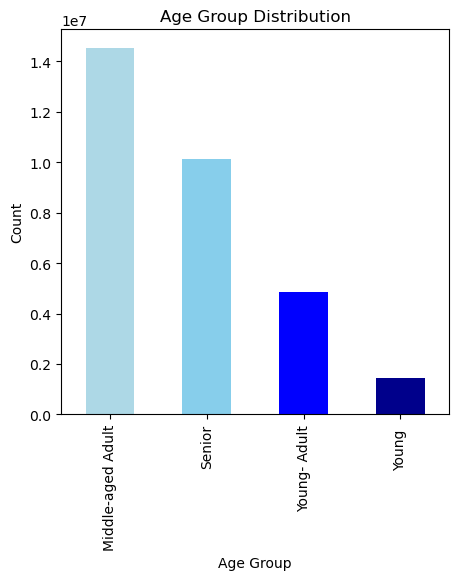

In [38]:
#Creating bar chart to visualise the different age groups 

Bar_Age=plt.figure(figsize=(5, 5))
Age_group_counts.plot(kind='bar', color=['lightblue','skyblue','blue','darkblue'])

# Add Title and tags
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

In [39]:
#Export chart

Bar_Age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_groups.png'))

In [40]:
# Creating crosstab for region and income group

income_region = pd.crosstab(df_total_high_act['region'], df_total_high_act['income_group'], dropna = False)

In [41]:
# Checking data

income_region

income_group,High income,Low income,Mid income,Mid-High income
region,,,,
Midwest,30583,783764,3077656,3369510
Northeast,15435,587137,2361064,2501049
South,31528,1142572,4504996,4632043
West,22483,849081,3451266,3604397


Text(0, 0.5, 'Income Group Count')

<Figure size 500x500 with 0 Axes>

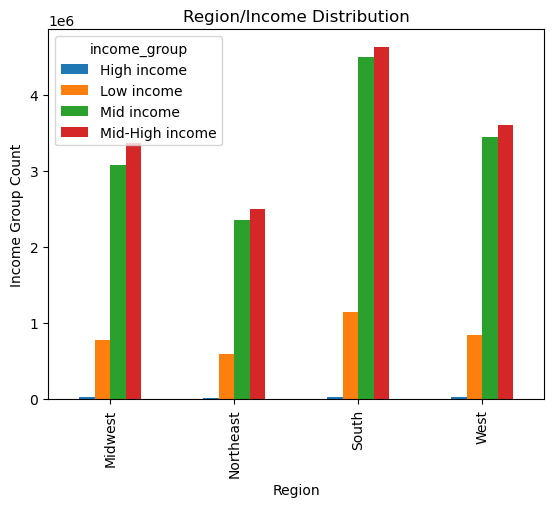

In [42]:
# Creating a bar chart on Region and income group data

#Creating bar chart to visualise the different age groups 

Income_bar=plt.figure(figsize=(5, 5))
income_region.plot(kind='bar')

# Add Title and tags
plt.title('Region/Income Distribution')
plt.xlabel('Region')
plt.ylabel('Income Group Count')

In [43]:
# Export bar chart 

Income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_region.png'))

In [44]:
# Creating crosstab for department goods and income group

department_group_region = pd.crosstab(df_total_high_act['department_group'], df_total_high_act['region'], dropna = False)

Text(0, 0.5, 'Count')

<Figure size 500x500 with 0 Axes>

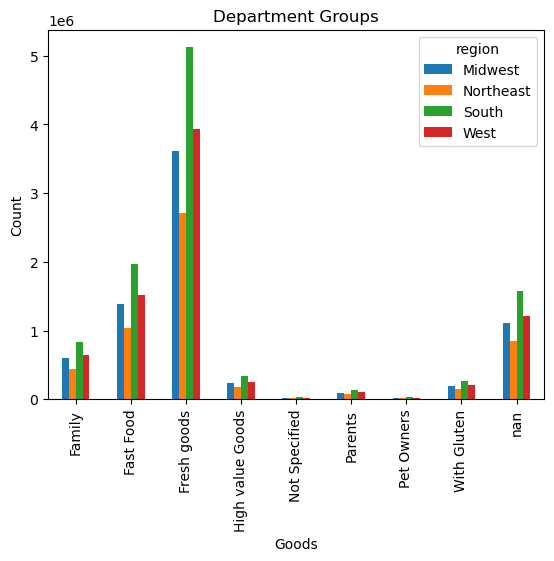

In [45]:
#Creating bar chart to visualise the department goods 

Depart_goods=plt.figure(figsize=(5, 5))
department_group_region.plot(kind='bar')

# Add Title and tags
plt.title('Department Groups')
plt.xlabel('Goods')
plt.ylabel('Count')

In [46]:
# Creating crosstab between 'day_group' and 'income_group'

income_day_group= pd.crosstab(df_total_high_act['day_group'], df_total_high_act['income_group'], dropna = False)

In [47]:
# Checking data from crosstab

income_day_group

income_group,High income,Low income,Mid income,Mid-High income
day_group,,,,
Weekday,72088,2472243,8880755,9339564
Weekend,27941,890311,4514227,4767435


Text(0.5, 1.0, 'Income Group Purchase Behaviour')

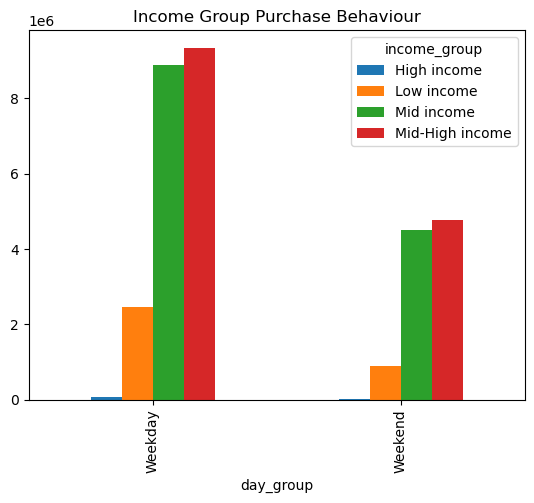

In [48]:
# Creating bar chart ot visualize data

income_day_group.plot.bar()
plt.title('Income Group Purchase Behaviour')

In [49]:
# Show distribution on 'order of the day' column

Order_hod = df_total_high_act['order_hour_of_day'].value_counts()

Text(0, 0.5, 'Frequency')

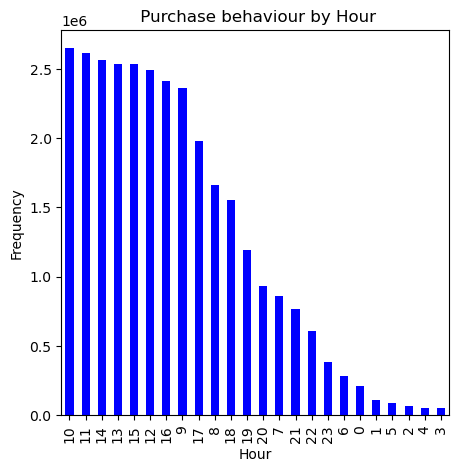

In [50]:
#Creating bar chart to visualise the different age groups 

Bar_hod=plt.figure(figsize=(5, 5))
Order_hod.plot(kind='bar', color='blue')

# Add Title and tags
plt.title(' Purchase behaviour by Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')

In [51]:
# Export chart

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Purchase_hour.png'))

<Figure size 640x480 with 0 Axes>

In [52]:
# Show distribution on 'order of the day' column

Purchase_hour_group = df_total_high_act['hour_group'].value_counts()

In [53]:
# Checking data 
Purchase_hour_group 

hour_group
Afternoon Shopper    13590355
Morning Shopper      12927366
Night Shopper         3494958
Wee-hours Shopper      951885
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

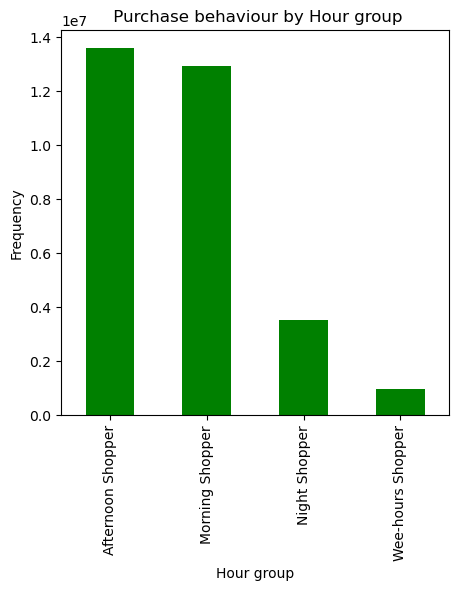

In [54]:
#Creating bar chart to visualise the different age groups 

Bar_hour_group=plt.figure(figsize=(5, 5))
Purchase_hour_group.plot(kind='bar', color='green')

# Add Title and tags
plt.title(' Purchase behaviour by Hour group')
plt.xlabel('Hour group')
plt.ylabel('Frequency')

In [55]:
#Export chart

Bar_hour_group.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'purchase_hour_group.png'))

In [56]:
# Creating crosstab for age group and day group

age_day_group = pd.crosstab(df_total_high_act['age_group'], df_total_high_act['day_group'], dropna = False)

In [57]:
# checking crosstab data

age_day_group

day_group,Weekday,Weekend
age_group,,
Middle-aged Adult,9765493,4782224
Senior,6775612,3336995
Young,978882,475846
Young- Adult,3244663,1604849


Text(0, 0.5, 'Frequency')

<Figure size 500x500 with 0 Axes>

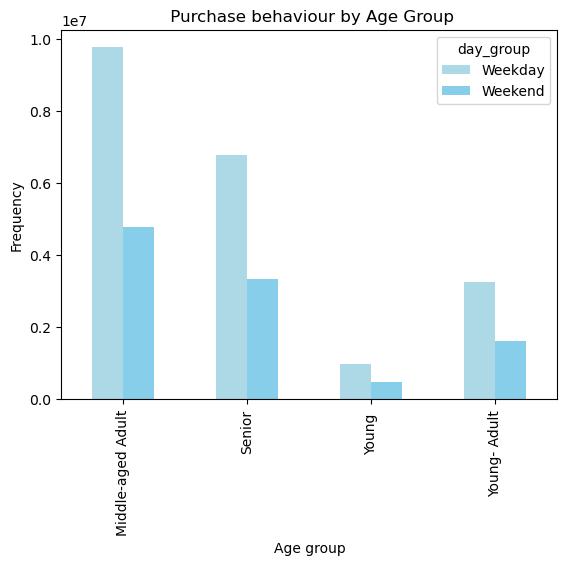

In [58]:
#Creating bar chart to visualise the different age groups 

Bar_age_day_group=plt.figure(figsize=(5, 5))
age_day_group.plot(kind='bar', color=['lightblue','skyblue','blue','darkblue'])

# Add Title and tags
plt.title(' Purchase behaviour by Age Group')
plt.xlabel('Age group')
plt.ylabel('Frequency')

In [59]:
# Export chart
Bar_age_day_group.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'purchase_hour_group.png'))

In [60]:
# Creating crosstab for departament group and age group

goods_per_age_group = pd.crosstab(df_total_high_act['age_group'], df_total_high_act['department_group'], dropna = False)

Text(0, 0.5, 'Count')

<Figure size 500x500 with 0 Axes>

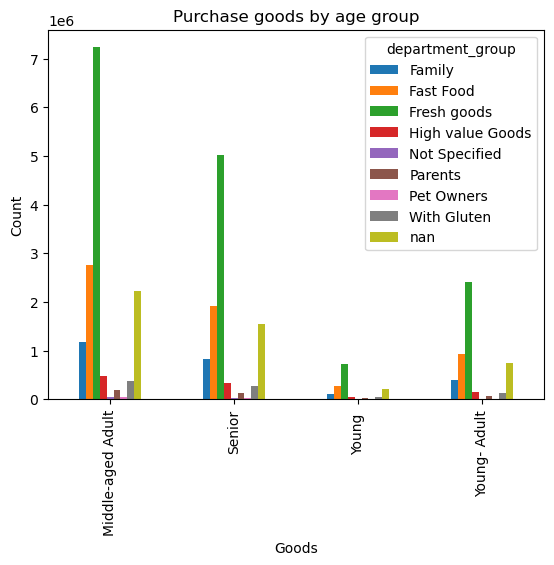

In [61]:
#Creating bar chart to visualise the department goods 

bar_goods=plt.figure(figsize=(5, 5))
goods_per_age_group.plot(kind='bar')

# Add Title and tags
plt.title('Purchase goods by age group')
plt.xlabel('Goods')
plt.ylabel('Count')


In [62]:
# Export chart 

bar_goods.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'purchase_goods_age_group.png'))

In [63]:
#Additional check: 
# Upon data disparity between low/mid income and mid-high and high income filtering data on DF_high_income

df_high_income = df_total_high_act[df_total_high_act['income_group'].isin(['High income', 'Mid-High income'])]

In [64]:
# Agrupar los datos por tipo de producto y grupo de ingresos, y contar las frecuencias

pd.crosstab(df_high_income['income_group'], df_total_high_act['department_group'], dropna = False)

department_group,Family,Fast Food,Fresh goods,High value Goods,Not Specified,Parents,Pet Owners,With Gluten,NaN
income_group,,,,,,,,,
High income,11036,20466,41867,2805,282,697,747,2824,19305
Mid-High income,1163060,2557791,7128917,459284,44919,195999,44342,389885,2122802


In [65]:
# Upon data disparity between low/mid income and mid-high and high income filtering data on DF_high_income

df_low_income= df_total_high_act[df_total_high_act['income_group'].isin(['Low income', 'Mid income'])]

In [66]:
# Agrupar los datos por tipo de producto y grupo de ingresos, y contar las frecuencias

pd.crosstab(df_low_income['income_group'], df_total_high_act['department_group'], dropna = False)

department_group,Family,Fast Food,Fresh goods,High value Goods,Not Specified,Parents,Pet Owners,With Gluten,NaN
income_group,,,,,,,,,
Mid income,1083964,2468273,6771065,435297,43545,184456,39359,364946,2004077


# QUESTION 7 . Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [67]:
#DF was still presenting outliers of $14,900.00 and $99,999.00. Removing them to get the adequate max order

df_total_high_act.loc[df_total_high_act['prices'] >100, 'prices'] = np.nan

In [68]:
#Checking removal the outliers

df_total_high_act.loc[df_total_high_act['prices'] > 100]

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,...,marital_status,income,_merge,region,exclusion_flag,age_group,income_group,department_group,day_group,hour_group


In [69]:
# Calculating max, min, mean on customer usage frequency and expenditure
#to calculate usage frequency  I am using 'days_since_prior_order' and 'prices'

agg_age= df_total_high_act.groupby('age_group').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max'],'income':['mean','min','max']})

In [70]:
# Checking data

agg_age

days_since_prior_order               prices             \
                                    mean  min   max      mean  min   max   
age_group                                                                  
Middle-aged Adult              10.810764  0.0  30.0  7.790713  1.0  25.0   
Senior                         10.791879  0.0  30.0  7.796144  1.0  25.0   
Young                          10.879634  0.0  30.0  7.794831  1.0  25.0   
Young- Adult                   10.826524  0.0  30.0  7.777369  1.0  25.0   

                          income                 
                            mean    min     max  
age_group                                        
Middle-aged Adult  100939.427944  25903  592409  
Senior             115992.086330  29001  593901  
Young               70495.549805  25972  396364  
Young- Adult        70614.783131  25937  392552

In [71]:
# Aggregation by income group

agg_income= df_total_high_act.groupby('income_group').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max'],'income':['mean','min','max']})

In [72]:
#Checking data for agg_income

agg_income

days_since_prior_order               prices             \
                                  mean  min   max      mean  min   max   
income_group                                                             
High income                  10.094693  0.0  30.0  7.755411  1.0  25.0   
Low income                   11.175808  0.0  30.0  6.707347  1.0  25.0   
Mid income                   10.762110  0.0  30.0  7.889856  1.0  25.0   
Mid-High income              10.774496  0.0  30.0  7.954829  1.0  25.0   

                        income                  
                          mean     min     max  
income_group                                    
High income      411626.859721  302234  593901  
Low income        39817.430126   25903   49998  
Mid income        76499.182515   50001  100000  
Mid-High income  133738.695911  100001  299955

In [73]:
# Aggregation by household size

agg_house= df_total_high_act.groupby('n_dependants').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max'],'income':['mean','min','max']})

In [74]:
# Checking data for agg_house

agg_house

days_since_prior_order               prices             \
                               mean  min   max      mean  min   max   
n_dependants                                                          
0                         10.791951  0.0  30.0  7.789550  1.0  25.0   
1                         10.802001  0.0  30.0  7.795910  1.0  25.0   
2                         10.830997  0.0  30.0  7.784014  1.0  25.0   
3                         10.816223  0.0  30.0  7.792886  1.0  25.0   

                    income                 
                      mean    min     max  
n_dependants                               
0             99896.801937  25903  584097  
1             99476.758266  25937  579397  
2             99649.519142  25911  593901  
3             99679.813181  25941  591089

In [75]:
# Aggregation by marital_status

agg_marital_status= df_total_high_act.groupby('marital_status').agg({'days_since_prior_order':['mean','min','max'],'prices':['mean','min','max'],'income':['mean','min','max']})

In [76]:
# Checking data for agg_house

agg_marital_status


days_since_prior_order               prices  \
                                                   mean  min   max      mean   
marital_status                                                                 
divorced/widowed                              10.750328  0.0  30.0  7.801014   
living with parents and siblings              10.750995  0.0  30.0  7.800604   
married                                       10.820875  0.0  30.0  7.790278   
single                                        10.813571  0.0  30.0  7.783597   

                                                    income                 
                                  min   max           mean    min     max  
marital_status                                                             
divorced/widowed                  1.0  25.0  115969.768975  29011  578251  
living with parents and siblings  1.0  25.0   70870.404339  25937  396364  
married                           1.0  25.0  101559.437850  25911  593901  
single                            1.0  25.0   91550.918195  25903  584097

# QUESTION. 8 COMPARE CUSTOMER PROFILES WITH REGIONS AND DEPARTMENTS

In [77]:
# importing DF with department goods information

df_departments= pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'department_wrangled.csv'))

In [78]:
#Checking df_departments data

df_departments.head(5)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [79]:
# Renaming 'unnamed' column as 'department_id'

df_departments.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [80]:
#Checking changes

df_departments.head(5)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [81]:
#Merging data based on key column department_id

df_total_high_dept = df_total_high_act.merge(df_departments, on = 'department_id', indicator = 'merge1')

In [82]:
# Checking merging process and new column 'merge1'

df_total_high_dept.head(5)

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,...,_merge,region,exclusion_flag,age_group,income_group,department_group,day_group,hour_group,department,merge1
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,...,both,Midwest,Include,Senior,Low income,Fast Food,Weekend,Morning Shopper,snacks,both
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,...,both,Midwest,Include,Senior,Low income,Fast Food,Weekend,Afternoon Shopper,snacks,both
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,...,both,Northeast,Include,Senior,Mid-High income,Fast Food,Weekend,Night Shopper,snacks,both
3,0,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,...,both,West,Include,Middle-aged Adult,Mid income,Fast Food,Weekday,Morning Shopper,snacks,both
4,0,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,...,both,South,Include,Young,Low income,Fast Food,Weekday,Afternoon Shopper,snacks,both


In [83]:
df_total_high_dept.dtypes

Unnamed: 0                       int64
product_id                       int64
product_name                    object
aisle_id                         int64
department_id                    int64
prices                         float64
order_id                         int64
user_id                          int64
order_number                     int64
order_dow                        int64
order_hour_of_day                int64
days_since_prior_order         float64
add_to_cart_order                int64
reordered                        int64
max_order                        int64
loyalty_flag                    object
mean_product_price             float64
spending_flag                   object
median_days_between_orders     float64
order_frequency                 object
first_name                      object
last_name                       object
gender                          object
state                           object
age                              int64
date_joined              

In [84]:
# Checking column 'department' data

df_total_high_dept['department'].value_counts()

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

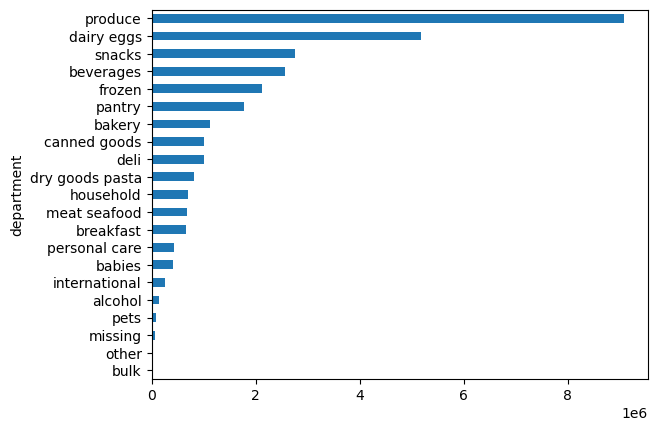

In [85]:
#Creating a bar chart on the 'department' data distribution

bar= df_total_high_dept.department.value_counts().sort_values().plot(kind = 'barh')

In [86]:
# Exporting chart

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Bar_department.png'))

In [87]:
# Creating crosstab for region and department

region_department = pd.crosstab(df_total_high_dept['region'], df_total_high_dept['department'], dropna = False)

In [88]:
#Checking data
region_department

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261753,598979,156155,7929,237459,1212490,234464,193463,...,166992,60666,158260,15563,7983,420334,100398,21358,2134115,645143
Northeast,25017,72712,199300,462929,117904,5599,176936,914616,178398,143817,...,124604,44678,118571,11512,6268,312731,74765,17734,1593004,493154
South,48813,139511,371620,859419,223172,11180,337458,1723016,333620,272813,...,230061,84649,224120,21787,11579,591754,142496,29909,3027476,916780
West,36754,102428,288155,650574,173619,8743,260221,1327060,257352,212043,...,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329


Text(0, 0.5, 'Count')

<Figure size 3000x2000 with 0 Axes>

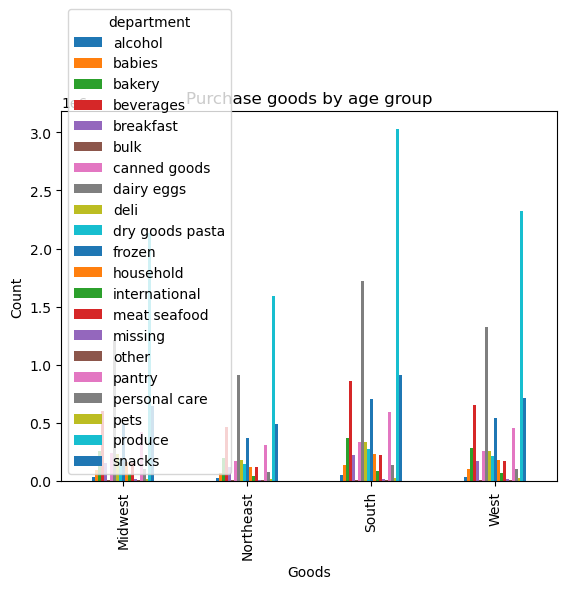

In [89]:
#Creating bar chart to visualise the data distribution

bar_goods=plt.figure(figsize=(30,20))
region_department.plot(kind='bar')

# Add Title and tags
plt.title('Purchase goods by age group')
plt.xlabel('Goods')
plt.ylabel('Count')

In [90]:
# As the graphic contains too much information I am selecting the departments with over 100K counts

departments_of_interest = ['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen', 'pantry', 'bakery', 'canned food', 'deli']

In [91]:
# Filtering DF including only the department information needed

filter_df_total_high_dept= df_total_high_dept[df_total_high_dept['department'].isin(departments_of_interest)]

In [92]:
# Create the crosstab

region_department2 = pd.crosstab(filter_df_total_high_dept['region'], filter_df_total_high_dept['department'], dropna=False)

Text(0, 0.5, 'Count')

<Figure size 1500x600 with 0 Axes>

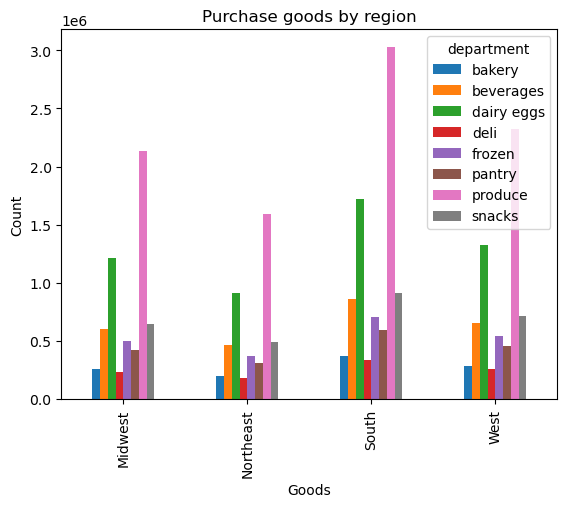

In [93]:
#Creating bar chart to visualise the data distribution

bar_goods=plt.figure(figsize=(15,6))
region_department2.plot(kind='bar')

# Add Title and tags
plt.title('Purchase goods by region')
plt.xlabel('Goods')
plt.ylabel('Count')

# OBSERVATIONS

**Midwest**: Produce goods have the highest count, followed by dairy eggs and snacks. Deli, and bakery have relatively lower counts. **Northeast**: Produce goods have the highest count, followed by dairy eggs and snacks. Deli, and bakery have relatively lower counts. **South**: Produce goods have the highest count, followed by dairy eggs and snacks. Deli, and bakery have relatively lower counts. **West**: Produce goods have the highest count, followed by dairy eggs and snacks. Deli, and bakery have relatively lower counts.
*
Overall, Produce is the most frequently purchased across all regions, with dairy eggs and snacks also being popular. Bakery and Deli items have lower purchase counts in comparis*on.

# QUESTION 9. ADDITTIONAL CHARTS

In [94]:
# Creating crosstab to anlyse distribution between age groups and regions

age_region=pd.crosstab(df_total_high_dept['region'],df_total_high_dept['age_group'],dropna=False)

In [95]:
# Checking data 

age_region

age_group,Middle-aged Adult,Senior,Young,Young- Adult
region,,,,
Midwest,3443696,2356770,340217,1120830
Northeast,2544196,1809013,253481,857995
South,4823008,3361229,494075,1632827
West,3736817,2585595,366955,1237860


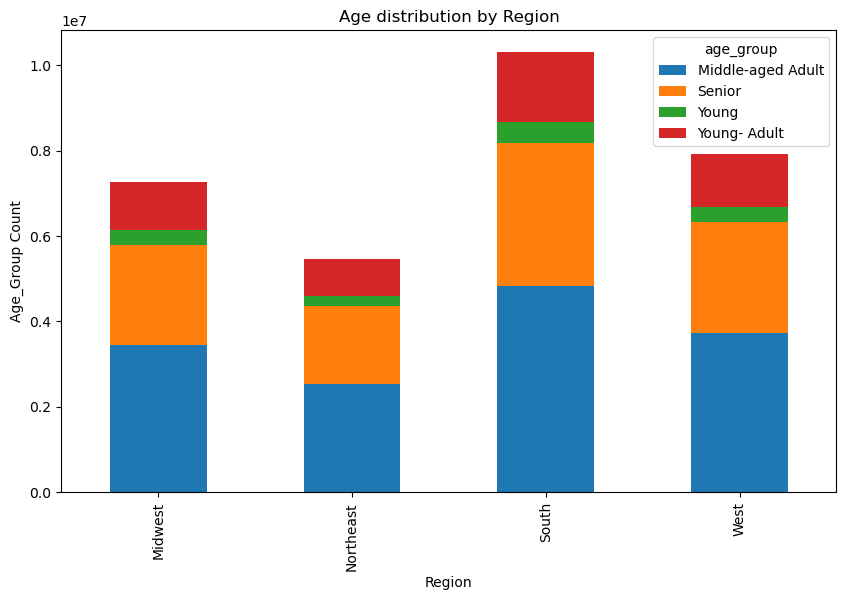

In [96]:
#Creating chart

age_region.plot(kind='bar', stacked=True, figsize=(10, 6))

# Title and tags
plt.title('Age distribution by Region')
plt.xlabel('Region')
plt.ylabel('Age_Group Count')

# Exporting data

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region.png'))

In [97]:
# Creating crosstab to anlyse distribution between marital_status and regions

marital_region=pd.crosstab(df_total_high_dept['region'],df_total_high_dept['marital_status'],dropna=False)

In [98]:
# Checking data 

marital_region

marital_status,divorced/widowed,living with parents and siblings,married,single
region,,,,
Midwest,617198,351435,5087262,1205618
Northeast,478767,256430,3853773,875715
South,877314,505457,7223749,1704619
West,671992,367850,5578927,1308458


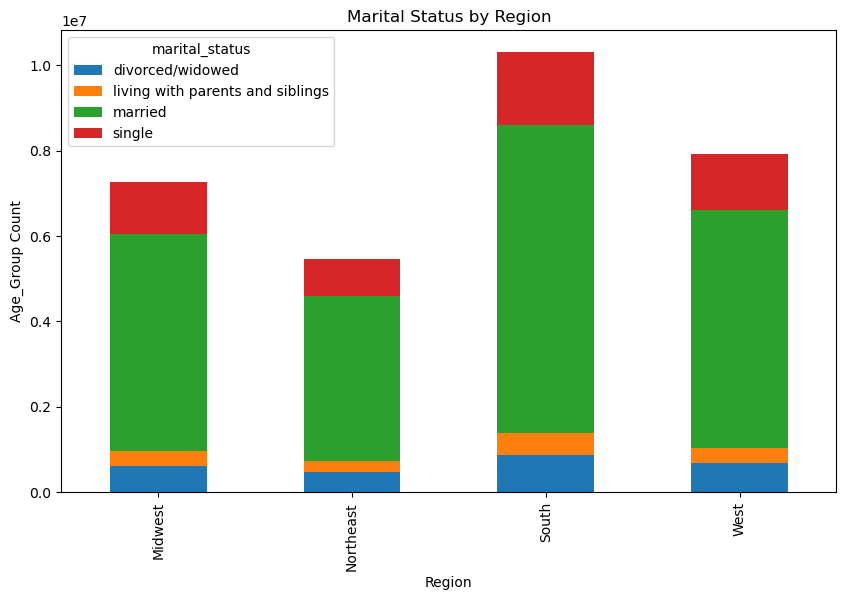

In [99]:
#Creating chart 

marital_region.plot(kind='bar', stacked=True, figsize=(10, 6))

# Title and tags
plt.title('Marital Status by Region')
plt.xlabel('Region')
plt.ylabel('Age_Group Count')

#Exporting data

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'marital_region.png'))

In [100]:
# Creating crosstab to anlyse distribution between loyalty_card and Spender_flag

loyalty_spending=pd.crosstab(df_total_high_dept['loyalty_flag'],df_total_high_dept['spending_flag'],dropna=False)


In [101]:
# Checking data on loyalty_spending

loyalty_spending

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,216600,10067493
New customer,84011,4719684
Regular customer,302814,15573962


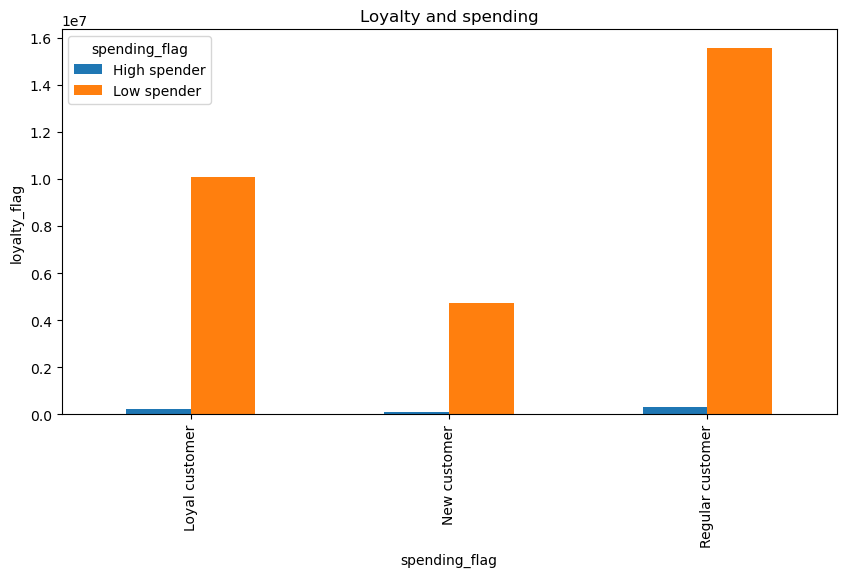

In [102]:
#Creating chart 

loyalty_spending.plot(kind='bar', figsize=(10,5))

# Title and tags
plt.title('Loyalty and spending')
plt.xlabel('spending_flag')
plt.ylabel('loyalty_flag')

#Exporting
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_spending.png'))

In [103]:
# Creating crosstab to check teh order_frequency and age_groups

order_age=pd.crosstab(df_total_high_dept['order_frequency'],df_total_high_dept['age_group'],dropna=False)

In [104]:
# Checking data on loyalty_spending

order_age

age_group,Middle-aged Adult,Senior,Young,Young- Adult
order_frequency,,,,
Frequent customer,9945153,6941627,997289,3320407
Non-frequent customer,1363788,942929,139424,448834
Regular customer,3238776,2228051,318015,1080271


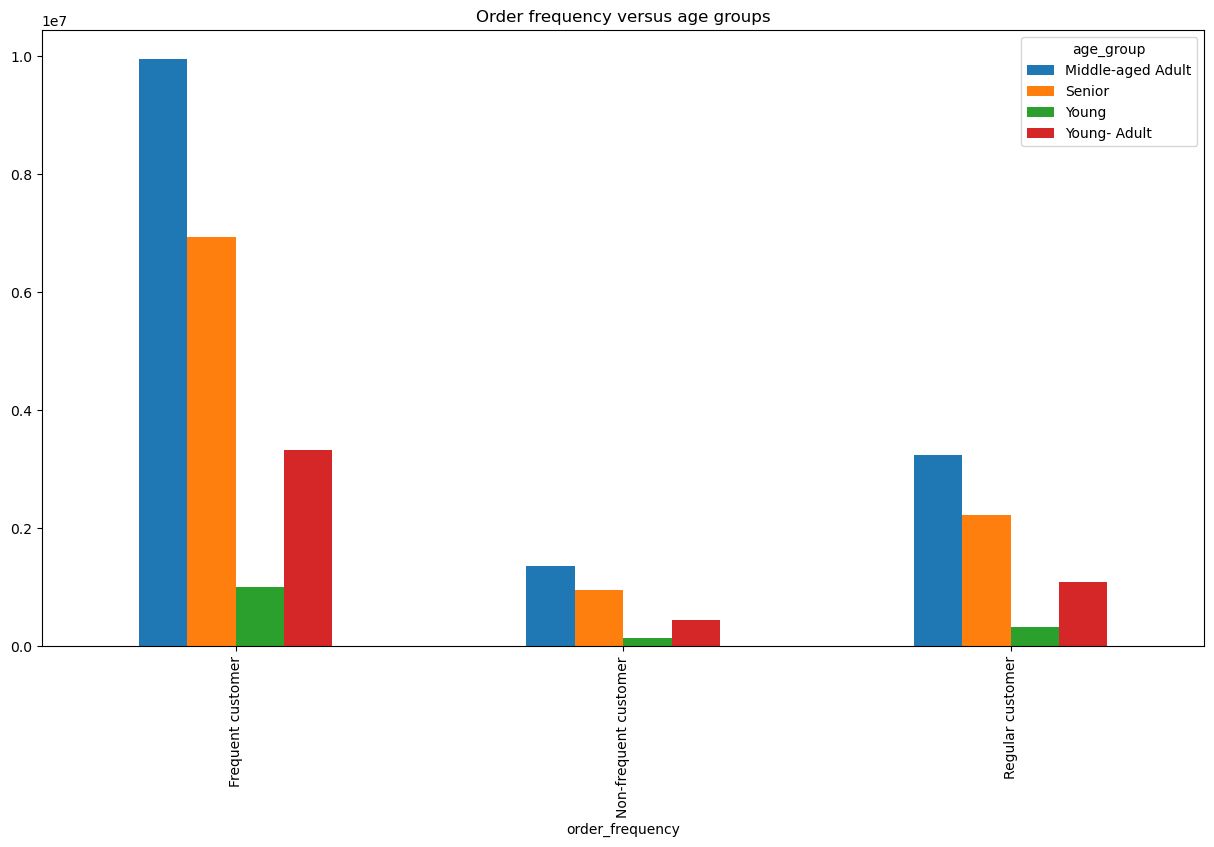

In [105]:
#Creating chart 

order_age.plot(kind='bar', figsize=(15,8))

# Title and tags
plt.title('Order frequency versus age groups')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_age.png'))

In [106]:
# Creating crosstab to check the region and order_frequency

region_frequency=pd.crosstab(df_total_high_dept['region'],df_total_high_dept['order_frequency'],dropna=False)

In [107]:
# Checking data from region_frequency

region_frequency

order_frequency,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,4935393,690030,1636090
Northeast,3740982,496911,1226792
South,7073789,968006,2269344
West,5454312,740028,1732887


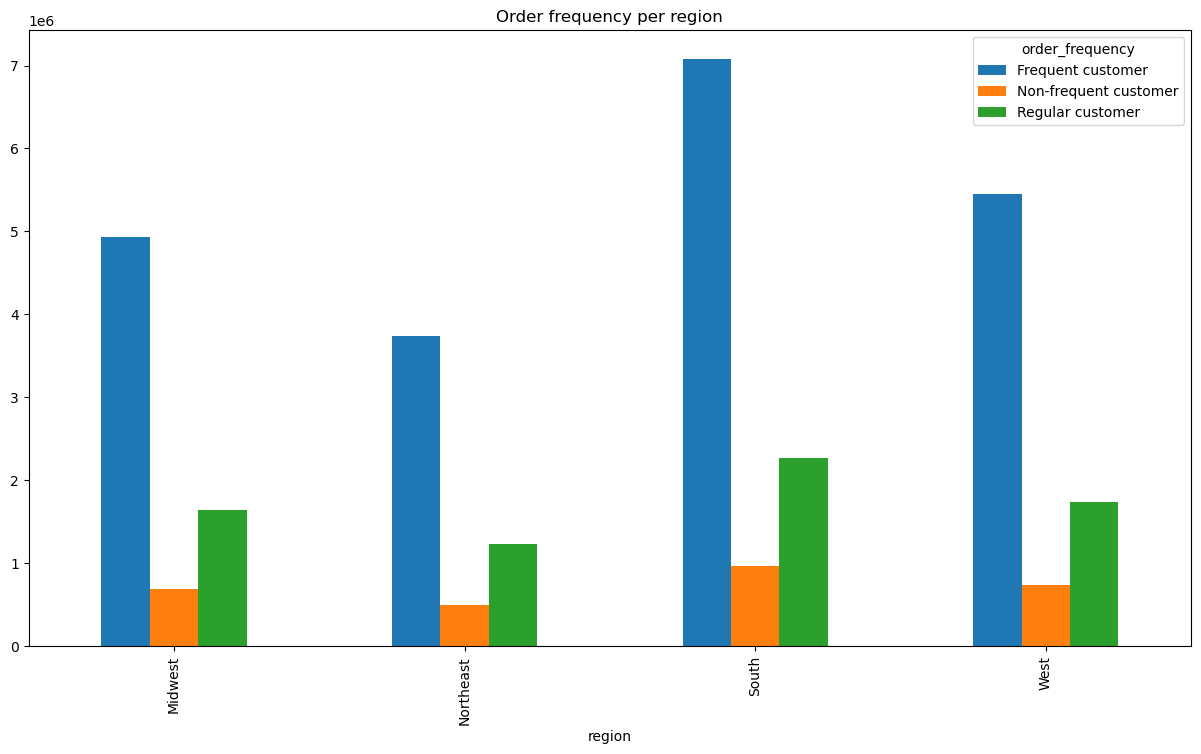

In [108]:
#Creating chart for region_frequency

region_frequency.plot(kind='bar', figsize=(15,8))

# Title and tags
plt.title('Order frequency per region')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_frequency.png'))

In [109]:
# Creating crosstab to check the region and spending flag

region_spending_flag=pd.crosstab(df_total_high_dept['region'],df_total_high_dept['spending_flag'],dropna=False)

In [110]:
# Checking data from region_spending_flag

region_spending_flag

spending_flag,High spender,Low spender
region,,
Midwest,148678,7112835
Northeast,103120,5361565
South,199339,10111800
West,152288,7774939


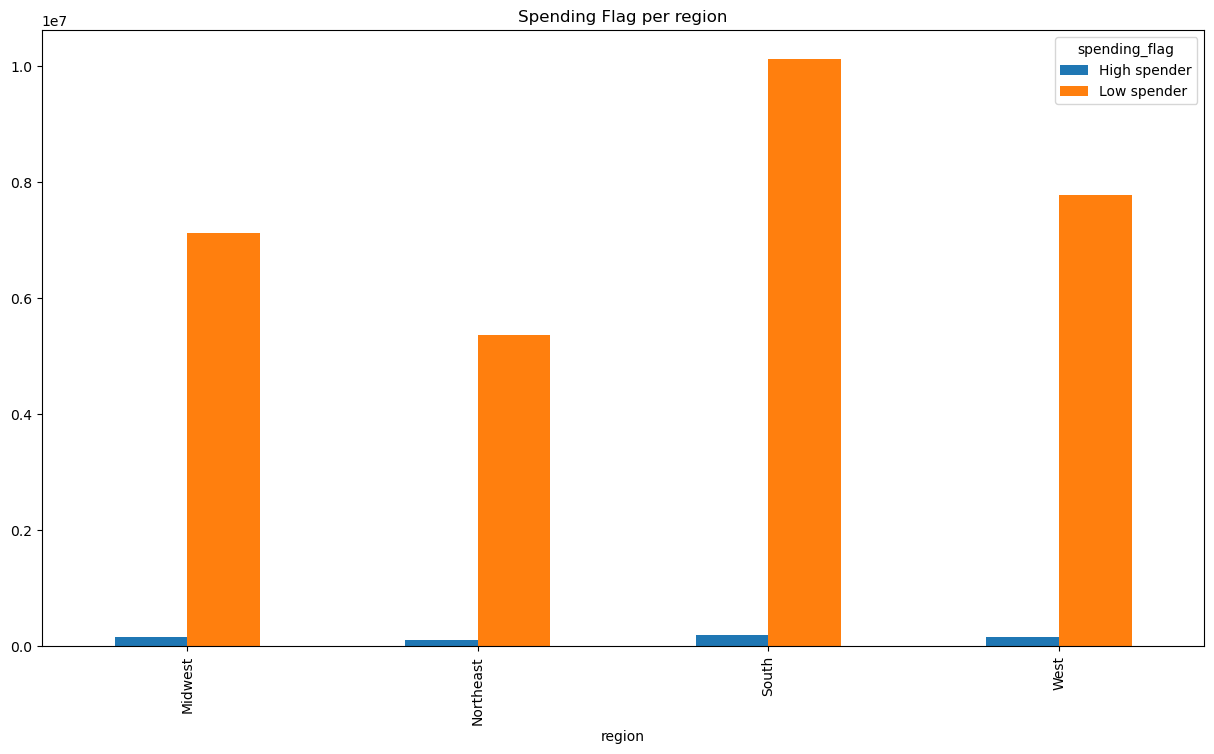

In [111]:
#Creating chart for region_spending_flag

region_spending_flag.plot(kind='bar', figsize=(15,8))

# Title and tags
plt.title('Spending Flag per region')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_spending_flag.png'))